# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fadhila Alya Syahfahlevi]
- **Email:** [m120b4kx1319@bangkit.academy]
- **ID Dicoding:** [m120b4kx1319]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan bike-sharing pada hari kerja dibandingkan akhir pekan?
- Bagaimana Pengaruh cuaca Terhadap Jumlah Penggunaan Sepeda per Jam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
PATH = "/content/drive/MyDrive/day.csv"

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
PATH = "/content/drive/MyDrive/hour.csv"

Mounted at /content/drive


In [ ]:
days_df = pd.read_csv("/content/drive/MyDrive/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hours_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melalui perintah head() menampilkan data di days.df sebanyak 5 data
- Melalui perintah head() menampilkan data di hours.df sebanyak 5 data

### Assessing Data

Menilai tabel days_df

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hours_df

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hours_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Setelah proses assesing tidak ada data duplikat diantar kedua tabel
- Tidak terdapat juga data yang kosong atau null dikedua tabel
- Terdapat tipe data yang masih obejct yaitu dteday






### Cleaning Data

Memperbaiki Tipe data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  status      731 non-null  

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sudah mengganti tipe data dteday di days_df menjadi tipe data datetime
- Sudah mengganti tipe data dteday di hours_df menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore days_df


In [ ]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
698,699,2012-11-29,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
42,43,2011-02-12,1,0,2,0,6,0,1,0.222500,0.232954,0.544167,0.203367,288,1184,1472
302,303,2011-10-30,4,0,10,0,0,0,1,0.319167,0.321329,0.623750,0.176617,885,2446,3331
55,56,2011-02-25,1,0,2,0,5,1,2,0.364348,0.350461,0.712174,0.346539,120,1341,1461


In [ ]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
days_df.instant.is_unique

True

In [ ]:
#Group by workingday dan agregasi berdasarkan total penggunaan
days_df.groupby('workingday').agg({'cnt':'sum'})

,cnt
workingday,
0,1000269
1,2292410


In [ ]:
#Group by weatherdit dan jam
hours_df.groupby(['weathersit', 'hr']).agg({'cnt':'mean'})

cnt
weathersit hr            
1          0    59.161554
           1    34.395918
           2    22.817992
           3    11.995604
           4     6.413567
...                   ...
3          22   70.345455
           23   49.373134
4          1    23.000000
           16   36.000000
           18  164.000000

[75 rows x 1 columns]

In [ ]:
# Mengelompokkan berdasarkan hari kerja dan menghitung total pengguna unik
days_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

,cnt
workingday,
1,2292410
0,1000269


In [ ]:
# Mengelompokkan berdasarkan kondisi cuaca dan jam, menghitung total penggunaan unik
hours_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)


,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [ ]:
# Mengelompokkan berdasarkan musim dan menghitung pengguna terdaftar
days_df.groupby(by="season").registered.sum().sort_values(ascending=False)


,registered
season,
3,835038
2,715067
4,711831
1,410726


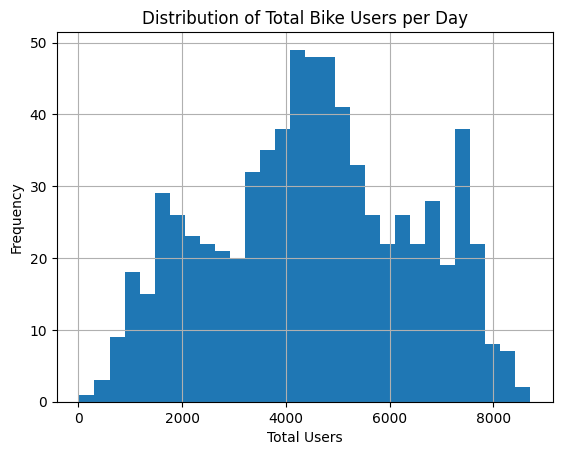

In [ ]:
import matplotlib.pyplot as plt

# Membuat histogram dari total pengguna (cnt)
days_df.cnt.hist(bins=30)
plt.title('Distribution of Total Bike Users per Day')
plt.xlabel('Total Users')
plt.ylabel('Frequency')
plt.show()


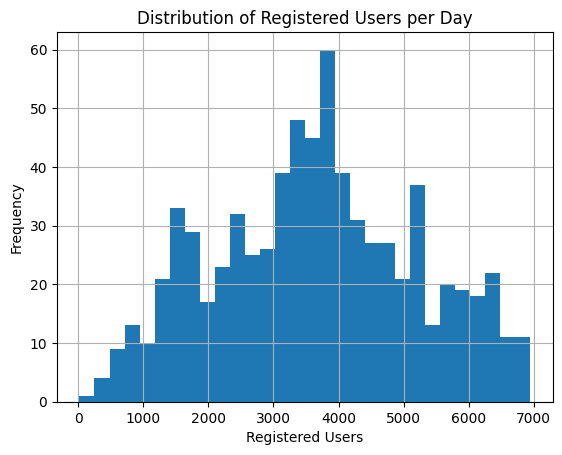

In [ ]:
# Membuat histogram dari pengguna registered
days_df.registered.hist(bins=30)
plt.title('Distribution of Registered Users per Day')
plt.xlabel('Registered Users')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Mengambil data customer_id yang terdaftar pada dataset 'hour.csv'
active_users = hours_df['registered']

# Menambahkan kolom status ke dataset 'day_data'
days_df['status'] = days_df['registered'].apply(lambda x: "Active" if x in active_users.values else "Non Active")

# Menampilkan sampel acak dari 5 baris
days_df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
36,37,2011-02-06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.141800,354,1269,1623,Non Active
486,487,2012-05-01,2,1,5,0,2,1,2,0.613333,0.577021,0.659583,0.156096,653,5087,5740,Non Active
564,565,2012-07-18,3,1,7,0,3,1,1,0.793333,0.745583,0.577083,0.137442,799,4914,5713,Non Active
132,133,2011-05-13,2,0,5,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692,3413,4105,Non Active
246,247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940,Non Active


In [ ]:
# Menambahkan kolom status berdasarkan kondisi cuaca
days_df['status'] = days_df['weathersit'].apply(lambda x: "Active" if x > 1 else "Non Active")

# Menampilkan sampel acak dari 5 baris
days_df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
241,242,2011-08-30,3,0,8,0,2,1,1,0.639167,0.594704,0.548333,0.125008,775,4429,5204,Non Active
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204,Non Active
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660,Non Active
705,706,2012-12-06,4,1,12,0,4,1,1,0.255833,0.258204,0.508750,0.174754,340,5035,5375,Non Active
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749,Non Active


In [ ]:
# Menggabungkan data days_df dan hours_df
days_hours_merged_df = pd.merge(
    left=hours_df,
    right=days_df,
    how="left",  # left join: semua data dari 'hour_data' dipertahankan
    left_on="dteday",  # Kolom kunci di tabel sebelah kiri (hour_data)
    right_on="dteday"  # Kolom kunci di tabel sebelah kanan (day_data)
)

# Melihat hasil penggabungan
days_hours_merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active


### Explore hours_df


In [ ]:
hours_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1822,1823,2011-03-21,2,0,3,16,0,1,1,2,0.54,0.5152,0.64,0.2836,29,112,141
16691,16692,2012-12-03,4,1,12,6,0,1,1,1,0.36,0.3788,0.93,0.0000,2,136,138
15564,15565,2012-10-15,4,1,10,17,0,1,1,1,0.56,0.5303,0.64,0.2537,96,670,766
2783,2784,2011-04-30,2,0,4,21,0,6,0,1,0.44,0.4394,0.62,0.1343,58,119,177
5544,5545,2011-08-23,3,0,8,22,0,2,1,1,0.62,0.6212,0.57,0.1343,46,145,191
7884,7885,2011-11-30,4,0,11,4,0,3,1,1,0.30,0.2879,0.75,0.2239,0,5,5
4878,4879,2011-07-27,3,0,7,4,0,3,1,1,0.72,0.6667,0.51,0.1940,1,3,4
4935,4936,2011-07-29,3,0,7,13,0,5,1,1,0.94,0.8333,0.31,0.0000,42,114,156
11160,11161,2012-04-15,2,1,4,5,0,0,0,1,0.50,0.4848,0.68,0.1642,4,6,10
6110,6111,2011-09-17,3,0,9,4,0,6,0,1,0.46,0.4545,0.72,0.1343,1,4,5


In [ ]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hours_df.sort_values(by="season", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6699,6700,2011-10-11,4,0,10,17,0,2,1,2,0.60,0.5758,0.78,0.2537,70,534,604
8036,8037,2011-12-06,4,0,12,12,0,2,1,3,0.46,0.4545,1.00,0.2239,5,50,55
8038,8039,2011-12-06,4,0,12,14,0,2,1,3,0.48,0.4697,1.00,0.2239,6,69,75
8039,8040,2011-12-06,4,0,12,15,0,2,1,3,0.50,0.4848,1.00,0.1940,2,43,45
8040,8041,2011-12-06,4,0,12,16,0,2,1,3,0.46,0.4545,1.00,0.2537,4,84,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,9226,2012-01-25,1,1,1,7,0,3,1,1,0.24,0.2273,0.75,0.2239,14,243,257
9224,9225,2012-01-25,1,1,1,6,0,3,1,1,0.24,0.2273,0.73,0.2239,1,87,88
9223,9224,2012-01-25,1,1,1,5,0,3,1,1,0.26,0.2424,0.70,0.2836,0,33,33
9222,9223,2012-01-25,1,1,1,4,0,3,1,1,0.26,0.2424,0.70,0.2836,0,4,4


In [ ]:
# Mengelompokkan data berdasarkan season dan melakukan agregasi
hours_df.groupby(by="season").agg({
    "hr": "nunique",       # Menghitung jumlah jam unik dalam setiap musim
    "cnt": "sum",           # Menjumlahkan total pengguna sepeda
    "temp": ["min", "max"]  # Mengambil suhu minimum dan maksimum
})


hr      cnt  temp      
       nunique      sum   min   max
season                             
1           24   471348  0.02  0.72
2           24   918589  0.16  0.94
3           24  1061129  0.38  1.00
4           24   841613  0.14  0.76

**Insight:**
- explatory dilakukan dengan mengelompokan kolom working day dan jumlah pengguna dengan fungsi groupby untuk menjawab no 1
- explatory juga dilakukan dengan mengelompokan kolom cuaca dan jumlah pengguna per jam dengan fungsi groupby untuk menjawab no 2

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penggunaan Bike-Sharing pada Hari Kerja Dibandingkan dengan Akhir Pekan?

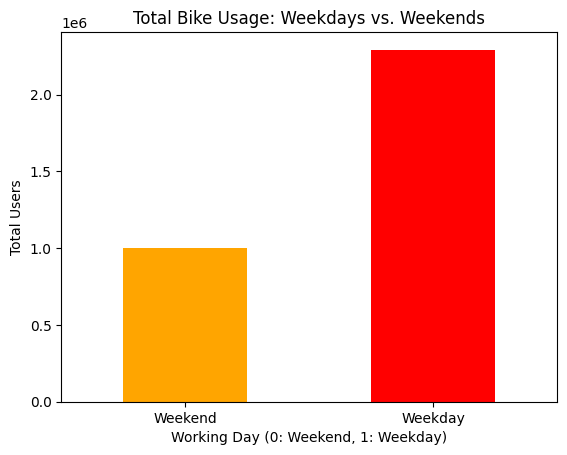

In [ ]:
# Mengelompokkan data berdasarkan workingday (0: Akhir Pekan, 1: Hari Kerja) dan menjumlahkan total penggunaan
workingday_usage = days_df.groupby('workingday')['cnt'].sum()

# Membuat Bar Chart
workingday_usage.plot(kind='bar', color=['orange', 'red'])
plt.title('Total Bike Usage: Weekdays vs. Weekends')
plt.xlabel('Working Day (0: Weekend, 1: Weekday)')
plt.ylabel('Total Users')
plt.xticks([0, 1], ['Weekend', 'Weekday'], rotation=0)
plt.show()

### Pertanyaan 2:Bagaimana Pengaruh Cuaca Terhadap Jumlah Penggunaan Sepeda per Jam?

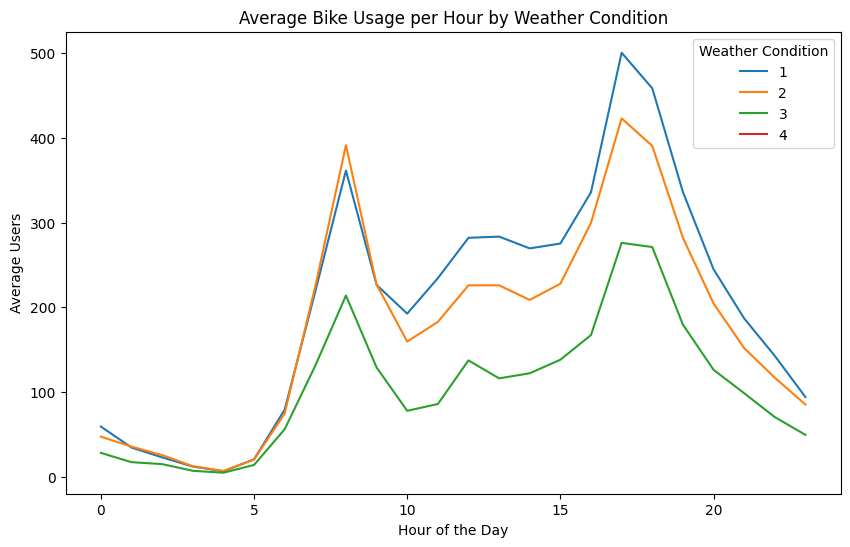

In [ ]:
# Mengelompokkan data berdasarkan kondisi cuaca dan jam, lalu menghitung rata-rata pengguna sepeda
hourly_weather_usage = hours_df.groupby(['hr', 'weathersit'])['cnt'].mean().unstack()

# Membuat Line Chart untuk melihat tren penggunaan sepeda per jam berdasarkan kondisi cuaca
hourly_weather_usage.plot(kind='line', figsize=(10, 6))
plt.title('Average Bike Usage per Hour by Weather Condition')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Users')
plt.legend(title='Weather Condition', loc='upper right')
plt.show()


**Insight:**
- Dari hasil visualisasi no 1, dapat diambil insight bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini bisa jadi disebabkan oleh banyaknya pengguna sepeda yang menggunakan tranportasi tersebut untuk pergi ke sekolah ataupun bekerja ke kantor. Sedangkan pada akhir pekan, penggunaan sepeda lebih sedikit karena bisa jadi orang-orang menggunakan waktu akhir pekan mereka untuk berekreasi dengan keluarga atau teman.
- Dari hasil visualisasi no 2, dapat diambil insight bahwa Kondisi cuaca memiliki dampak yang signifikan terhadap jumlah pengguna sepeda. Pengguna sepeda menurun drastis ketika cuaca buruk, seperti hujan atau kabut. Sebaliknya, pada cuaca yang cerah, penggunaan sepeda lebih tinggi. Variabel cuaca seperti suhu dan kelembaban juga berkontribusi besar terhadap jumlah pengguna.

## Analisis Lanjutan (Opsional)

Regresi Linier untuk memprediksi penggunaan sepeda

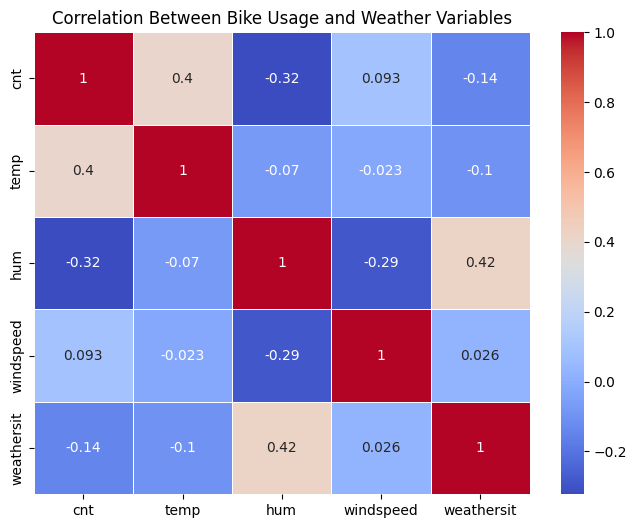

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang relevan untuk analisis korelasi
correlation_data = hours_df[['cnt', 'temp', 'hum', 'windspeed', 'weathersit']]

# Membuat heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Bike Usage and Weather Variables')
plt.show()




**Insight:**
- Suhu berpengaruh positif terhadap penggunaan sepeda; semakin tinggi suhu (tetapi masih dalam batas nyaman), semakin tinggi penggunaan sepeda. Namun, ketika suhu menjadi terlalu panas atau terlalu dingin, jumlah pengguna cenderung menurun. Kelembaban yang tinggi juga menurunkan jumlah pengguna sepeda, terutama ketika kelembaban di atas batas kenyamanan.Korelasi antar variabel (heatmap) menunjukkan bahwa suhu memiliki korelasi positif sedang dengan jumlah pengguna, sementara kelembaban dan kecepatan angin memiliki korelasi negatif terhadap penggunaan sepeda.




## Conclusion

**Conclution pertanyaan 1:** Pada hari kerja, penggunaan sepeda cenderung lebih tinggi dibandingkan akhir pekan (Temuan). Hal ini kemungkinan disebabkan oleh penggunaan sepeda yang dijadikan sebagai pilihan transportasi untuk pergi ke sekolah ataupun ke kantor. Sebaliknya d akhir pekan, sepertinya masyarakat lebih memilih kegiatan sosial dan berekreasi dengan keluarga(Analisis). Penyedia layanan bike-sharing dapat memanfaatkan temuan ini dengan meningkatkan jumlah sepeda dan ketersediaan layanan pada jam-jam sibuk di hari kerja, sementara juga mempertimbangkan strategi untuk menarik pengguna di akhir pekan, seperti promosi atau acara komunitas(Implikasi).

**Conclution pertanyaan 2:** Data menunjukkan bahwa penggunaan sepeda meningkat pada cuaca cerah dan hangat, sedangkan pada kondisi buruk (hujan, kabut) atau cuaca ekstrem (sangat panas atau sangat dingin), jumlah pengguna sepeda menurun drastis (Temuan). Keterkaitan ini mencerminkan kenyamanan dan preferensi pengguna sepeda yang cenderung memilih bersepeda dalam kondisi cuaca yang menyenangkan. Kelembaban yang tinggi dan suhu yang ekstrem juga mempengaruhi keputusan pengguna untuk bersepeda(Analisis). Untuk mengoptimalkan penggunaan sepeda, penyedia layanan dapat mempertimbangkan untuk menawarkan layanan yang lebih fleksibel berdasarkan cuaca, seperti penyewaan sepeda yang lebih terjangkau pada hari-hari dengan perkiraan cuaca baik atau menawarkan perlindungan tambahan saat cuaca buruk(Implikasi).